In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
%matplotlib inline  

sns.set_style("whitegrid")

In [4]:
features_df = pd.read_csv('1112028701-5fSGPkcoJNxUoRraRcJ9WQ.csv')

In [5]:
features_df.head()

,id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,6nz8W5q940pEthdQfjwYhh,0.213,0.101,134.968,0.0329,0.882000,0.851000,3,0.354,2,198444,-16.463,0.158,0,audio_features,spotify:track:6nz8W5q940pEthdQfjwYhh
1,7sBRwgYSf6dwyIi9T6uY7y,0.223,0.114,109.466,0.0651,0.970000,0.888000,4,0.758,8,213637,-13.275,0.265,1,audio_features,spotify:track:7sBRwgYSf6dwyIi9T6uY7y
2,4PYoRZpEoJHAi22nbeGA0b,0.844,0.238,119.987,0.0407,0.000186,0.539000,4,0.539,1,199800,-5.604,0.466,1,audio_features,spotify:track:4PYoRZpEoJHAi22nbeGA0b
3,3JCvbJlquC5ZhdXhHq62Z5,0.991,0.290,83.995,0.0960,0.000018,0.000000,4,0.477,5,192261,-2.692,0.364,0,audio_features,spotify:track:3JCvbJlquC5ZhdXhHq62Z5
4,3tyFkV691mLN162OMYP5Vi,0.659,0.118,106.913,0.0293,0.002110,0.000017,4,0.573,3,266947,-5.271,0.204,0,audio_features,spotify:track:3tyFkV691mLN162OMYP5Vi


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 16 columns):
id                  705 non-null object
energy              705 non-null float64
liveness            705 non-null float64
tempo               705 non-null float64
speechiness         705 non-null float64
acousticness        705 non-null float64
instrumentalness    705 non-null float64
time_signature      705 non-null int64
danceability        705 non-null float64
key                 705 non-null int64
duration_ms         705 non-null int64
loudness            705 non-null float64
valence             705 non-null float64
mode                705 non-null int64
type                705 non-null object
uri                 705 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 88.2+ KB


In [7]:
features_df.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.693043,0.184952,124.726033,0.064389,0.169982,0.166389,3.919149,0.548540,5.489362,268839.582979,-7.211206,0.454392,0.551773
std,0.218178,0.155091,26.948960,0.058233,0.269039,0.305278,0.325069,0.167452,3.475599,87209.176094,3.420787,0.227066,0.497665
min,0.056300,0.015600,68.992000,0.023200,0.000004,0.000000,1.000000,0.154000,0.000000,55973.000000,-24.738000,0.035600,0.000000
25%,0.546000,0.097000,105.821000,0.034200,0.001820,0.000002,4.000000,0.432000,2.000000,212310.000000,-8.966000,0.279000,0.000000
50%,0.748000,0.121000,123.781000,0.044800,0.019700,0.000572,4.000000,0.548000,6.000000,244720.000000,-6.485000,0.433000,1.000000
75%,0.873000,0.221000,140.049000,0.066000,0.223000,0.138000,4.000000,0.671000,9.000000,304560.000000,-4.626000,0.628000,1.000000
max,0.997000,0.991000,245.997000,0.497000,0.979000,0.950000,5.000000,0.928000,11.000000,759360.000000,-1.606000,0.966000,1.000000


In [48]:
feature_columns = ['energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'valence']
mean_values = {}
std_values = {}

for feature in feature_columns:
    mean = features_df[feature].mean()
    mean_values[feature] = [mean]
    std = features_df[feature].std()
    std_values[feature] = [std]

feature_means_df = pd.DataFrame(data=mean_values)
std_values_df = pd.DataFrame(data=std_values)

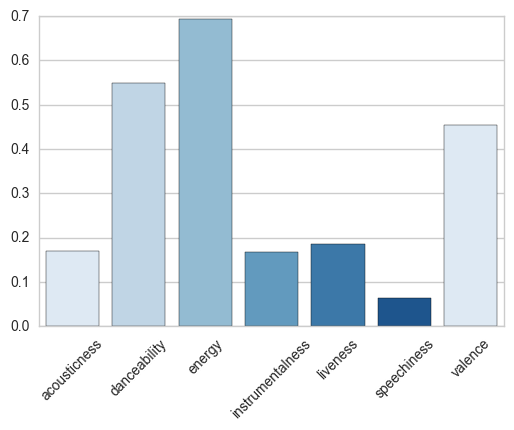

In [44]:
feature_plot = sns.barplot(data=feature_means_df, palette=sns.color_palette("Blues"))

for item in feature_plot.get_xticklabels():
    item.set_rotation(45)

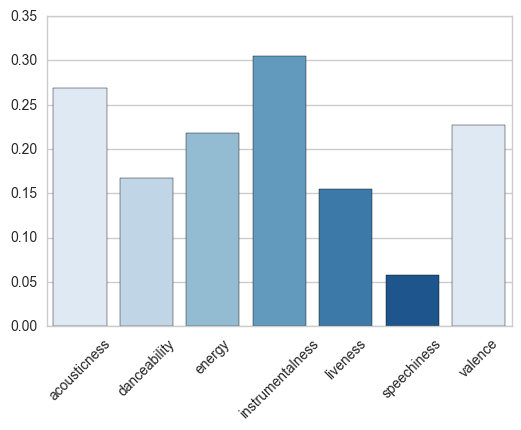

In [49]:
std_plot = sns.barplot(data=std_values_df, palette=sns.color_palette("Blues"))

for item in std_plot.get_xticklabels():
    item.set_rotation(45)

In [45]:
cleaned_feature_df = features_df.drop(['tempo', 'time_signature', 'key', 'duration_ms', 'loudness', 'mode', 'type', 'uri'], axis=1)
cleaned_feature_df.head(10)

,id,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence
0,6nz8W5q940pEthdQfjwYhh,0.213,0.101,0.0329,0.882000,0.851000,0.354,0.158
1,7sBRwgYSf6dwyIi9T6uY7y,0.223,0.114,0.0651,0.970000,0.888000,0.758,0.265
2,4PYoRZpEoJHAi22nbeGA0b,0.844,0.238,0.0407,0.000186,0.539000,0.539,0.466
3,3JCvbJlquC5ZhdXhHq62Z5,0.991,0.290,0.0960,0.000018,0.000000,0.477,0.364
4,3tyFkV691mLN162OMYP5Vi,0.659,0.118,0.0293,0.002110,0.000017,0.573,0.204
5,29lBMAu32Yaooj3QdzKwMO,0.949,0.316,0.0730,0.000012,0.002340,0.413,0.364
6,24l3sA2bx0DdM9d4pfgywU,0.878,0.225,0.0407,0.003460,0.000022,0.486,0.316
7,1JIEHfirWnJETcZZegwqXD,0.460,0.337,0.0307,0.223000,0.000728,0.469,0.390
8,250Y5ghha5UHY1mMgWZ2nD,0.299,0.108,0.0391,0.901000,0.950000,0.386,0.832
9,0ec5rFBAAB1rbC4qqqYazX,0.436,0.139,0.0344,0.404000,0.309000,0.722,0.379


## Clustering by K-means

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters=5)

In [53]:
kmeans.fit(cleaned_feature_df.drop('id', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_

array([[ 0.80239636,  0.19871273,  0.06902655,  0.0359336 ,  0.02501581,
         0.43266545,  0.33855491],
       [ 0.69659804,  0.15157353,  0.06047843,  0.05043471,  0.78008824,
         0.67453922,  0.43407059],
       [ 0.76155729,  0.18365365,  0.07074635,  0.07838195,  0.02733726,
         0.65526042,  0.70046354],
       [ 0.39140467,  0.20052804,  0.04937664,  0.63882243,  0.03093824,
         0.54701869,  0.39109626],
       [ 0.30289655,  0.12298966,  0.04746552,  0.7382069 ,  0.76886207,
         0.50324138,  0.22870345]])

In [55]:
kmeans.labels_

array([4, 4, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 1, 4, 0,
       3, 2, 2, 2, 4, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 4, 0,
       1, 1, 0, 3, 0, 4, 2, 0, 3, 0, 2, 0, 0, 3, 2, 4, 0, 0, 1, 4, 1, 0, 0,
       0, 2, 0, 2, 0, 1, 0, 3, 3, 0, 2, 3, 3, 0, 2, 1, 1, 2, 3, 2, 4, 0, 0,
       0, 2, 2, 3, 4, 2, 0, 3, 4, 3, 1, 1, 1, 2, 0, 2, 0, 4, 3, 3, 3, 3, 0,
       4, 0, 2, 1, 3, 3, 1, 2, 0, 0, 0, 0, 0, 4, 1, 0, 3, 3, 3, 0, 2, 0, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 3, 2, 4, 3, 1, 3, 3, 2, 3, 4,
       3, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 4, 0, 2, 4, 4, 3, 4, 0, 2, 3, 0, 3,
       3, 2, 0, 2, 3, 0, 3, 1, 1, 0, 0, 1, 2, 1, 0, 4, 0, 2, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 0, 2, 0, 0, 3, 3, 3, 3, 1, 0, 2, 2, 3, 2, 2, 3, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 3, 3, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 0,
       0, 1, 3, 2, 2, 1, 0, 3, 2, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 3, 0, 2,
       2, 0,

In [56]:
clustered_features_df = cleaned_feature_df
clustered_features_df['cluster'] = kmeans.labels_

In [57]:
clustered_features_df.head()

,id,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence,cluster
0,6nz8W5q940pEthdQfjwYhh,0.213,0.101,0.0329,0.882000,0.851000,0.354,0.158,4
1,7sBRwgYSf6dwyIi9T6uY7y,0.223,0.114,0.0651,0.970000,0.888000,0.758,0.265,4
2,4PYoRZpEoJHAi22nbeGA0b,0.844,0.238,0.0407,0.000186,0.539000,0.539,0.466,1
3,3JCvbJlquC5ZhdXhHq62Z5,0.991,0.290,0.0960,0.000018,0.000000,0.477,0.364,0
4,3tyFkV691mLN162OMYP5Vi,0.659,0.118,0.0293,0.002110,0.000017,0.573,0.204,0


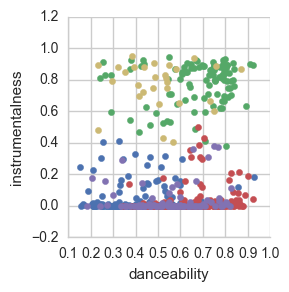

In [68]:
clustered_features_df_plot = sns.FacetGrid(data=clustered_features_df, hue="cluster")
clustered_features_df_plot.map(plt.scatter, 'danceability', 'instrumentalness')